In [78]:
import numpy as np
from sklearn.datasets import make_regression, make_classification
import matplotlib.pyplot as plt

In [190]:
X = np.load('Dataset/LinearX.npy')
Y = np.load('Dataset/LinearY.npy')

In [191]:
X = (X-X.mean())/X.std()

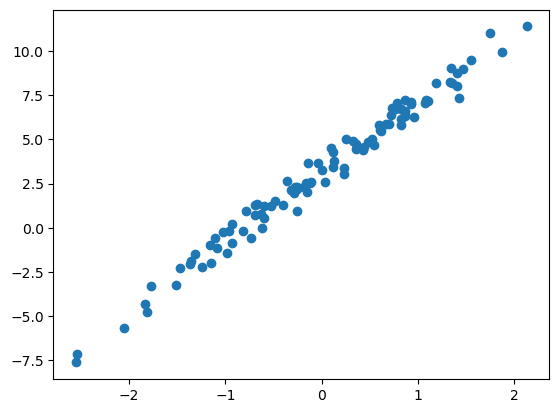

In [192]:

plt.scatter(X,Y)
plt.show()

### Linear Regression Modeling

In [193]:
def y_hat(theta,x):  #  return a line y=theta[0]+theta[1]*X
    return theta[0] + theta[1]*x

def error(X,Y,theta):  # Mean square error function code
    Y_ = y_hat(theta,X)   # calling avobe fuction to get line 
    e =  np.sum((Y_ - Y)**2)  # calculate the square deferance between error 
    m = X.shape[0]  # the number of values in x
    return e/m  # retuning the mean of x

def getGrad(X,Y,theta):
    grad = np.zeros((2,))  # It is assiging a list [0,0]
    Y_ = y_hat(theta,X)  # taking the predctive line from above
    
    grad[0] = 2*np.sum(Y_ - Y)  #eferenciation of mean sqare at Q0
    grad[1] = 2*np.sum( (Y_ - Y)*X)  # deferenciation of mean sqare at Q0
    m = X.shape[0]  
    return grad/m  # deiviging the differenciated value with mean
    
# theta=theta -lR* grad is the basic formula to linear regression
def gradDescent(X,Y,lr,iteration):  # the main function 
    theta = np.zeros((2,))   # list [0,0]
    # 
    error_list = []  # taking empty list to store some value
    for i in range(iteration):  #  iterating over all the value
        grad = getGrad(X,Y,theta)  # it contain theta0,theta1 from avove
        theta = theta - lr*grad   #using gradent decent algorithm
        e = error(X,Y,theta)    # error difference
        error_list.append(e)  # appeng the error 
        
    return theta,error_list

In [194]:
l=0.01
itr=200
theta,error_list = gradDescent(X,Y,l,itr)

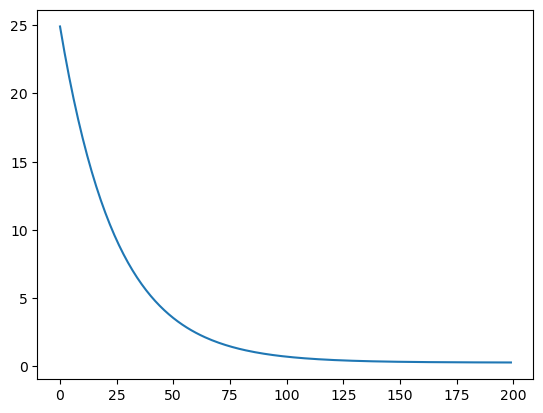

In [195]:
plt.plot(error_list)

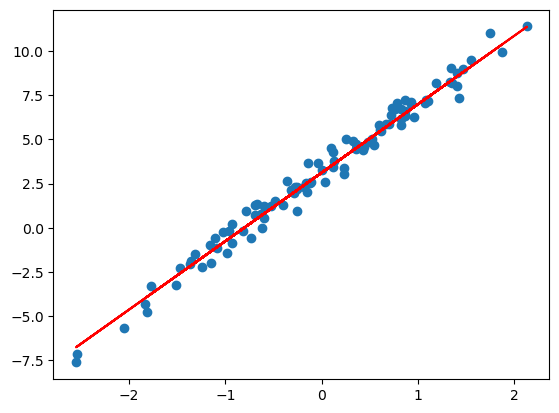

In [196]:
plt.scatter(X,Y)
Y_ = y_hat(theta,X)
plt.plot(X,Y_,color='red')
plt.show()

###  Applying Early stopping in the code

In [197]:
def y_hat(theta,x):  #  return a line y=theta[0]+theta[1]*X
    return theta[0] + theta[1]*x

def error(X,Y,theta):  # Mean square error function code
    Y_ = y_hat(theta,X)   # calling avobe fuction to get line 
    e =  np.sum((Y_ - Y)**2)  # calculate the square deferance between error 
    m = X.shape[0]  # the number of values in x
    return e/m  # retuning the mean of x

def getGrad(X,Y,theta):
    grad = np.zeros((2,))  # It is assiging a list [0,0]
    Y_ = y_hat(theta,X)  # taking the predctive line from above
    
    grad[0] = 2*np.sum(Y_ - Y)  #eferenciation of mean sqare at Q0
    grad[1] = 2*np.sum( (Y_ - Y)*X)  # deferenciation of mean sqare at Q0
    m = X.shape[0]  
    return grad/m  # deiviging the differenciated value with mean
    
# theta=theta -lR* grad is the basic formula to linear regression
def gradDescent(X, Y, lr, iterations, tol=1e-5):
    theta = np.zeros((2,))  # Initialize theta
    error_list = []  # Initialize list to store errors
    prev_error = float('inf')  # Initialize previous error with infinity
    
    for i in range(iterations):
        grad = getGrad(X, Y, theta)  # Compute gradient
        theta = theta - lr * grad  # Update theta using gradient descent
        error_curr = error(X, Y, theta)  # Calculate current error
        error_list.append(error_curr)  # Append current error to error list
        
        # Check if the error has decreased by less than tolerance
        if prev_error - error_curr < tol:
            print("Early stopping at iteration:", i)
            break
        
        prev_error = error_curr  # Update previous error
    
    return theta, error_list

In [198]:
l=0.01
itr=200
theta,error_list = gradDescent(X,Y,l,itr)

In [ ]:
pl